In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
#load the dataset
data=pd.read_csv("C:/Users/pc/Downloads/student-mat-pass-or-fail.csv")

In [7]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,1


In [8]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


In [9]:
data['pass']=data['G3'].apply(lambda x:1 if x>=10 else 0)

In [10]:
#data preprocessing
#dropping irrelevant features
data=data.drop(['G1','G2','G3'],axis=1)

In [11]:
#one hot encoding to conert all categorical data to numerical
data = pd.get_dummies(data, drop_first=True)

In [13]:
#Split into features and labels
x=data.drop('pass',axis=1)
y=data['pass']

In [14]:
#training the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#predicting
y_pred = model.predict(x_test)


In [21]:
#evaluationg the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy_score:.2f}")
print("Classification Report")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy:0.71
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.33      0.44        27
           1       0.72      0.90      0.80        52

    accuracy                           0.71        79
   macro avg       0.68      0.62      0.62        79
weighted avg       0.70      0.71      0.68        79


Confusion Matrix:
[[ 9 18]
 [ 5 47]]


In [22]:
test_accuracy=model.score(x_test,y_test)
print(test_accuracy)

0.7088607594936709


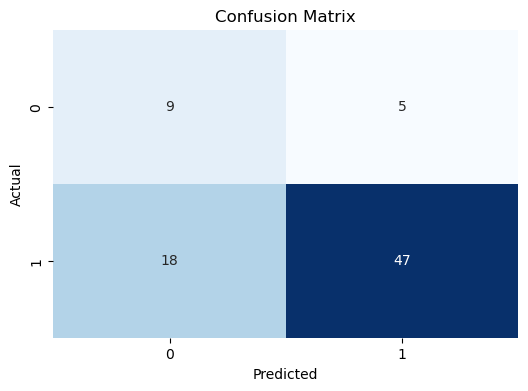

In [24]:
plt.figure(figsize=(6,4))
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
